In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
df = pd.read_csv("training_set1")

In [3]:
%matplotlib inline

In [4]:
df = df[['Release','MoR','Budgets','Theaters','Total Gross']]
df.head()

,Release,MoR,Budgets,Theaters,Total Gross
0,How the Grinch Stole Christmas,11,123.0,3256,260.044825
1,Mission: Impossible II,5,125.0,3669,215.409889
2,Gladiator,5,103.0,3188,187.705427
3,The Perfect Storm,6,120.0,3407,182.618434
4,Meet the Parents,10,55.0,2697,166.244045


In [5]:
def label_hit_or_flop(df):
    ratio = df['Total Gross'] / df['Budgets']
    return 'Hit' if ratio > 1 else 'Flop'

In [6]:
df['Potential'] = df.apply(lambda df: label_hit_or_flop(df), axis=1)

In [7]:
df.head()

,Release,MoR,Budgets,Theaters,Total Gross,Potential
0,How the Grinch Stole Christmas,11,123.0,3256,260.044825,Hit
1,Mission: Impossible II,5,125.0,3669,215.409889,Hit
2,Gladiator,5,103.0,3188,187.705427,Hit
3,The Perfect Storm,6,120.0,3407,182.618434,Hit
4,Meet the Parents,10,55.0,2697,166.244045,Hit


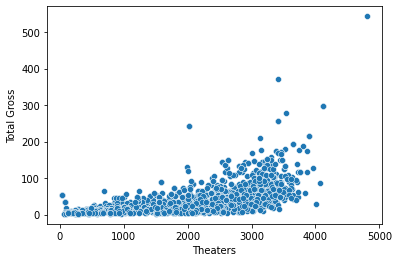

In [8]:
sb.scatterplot(x="Theaters",y='Total Gross',data=df[(df['Budgets']<=50)&(df['Budgets']>=0)])
plt.show()

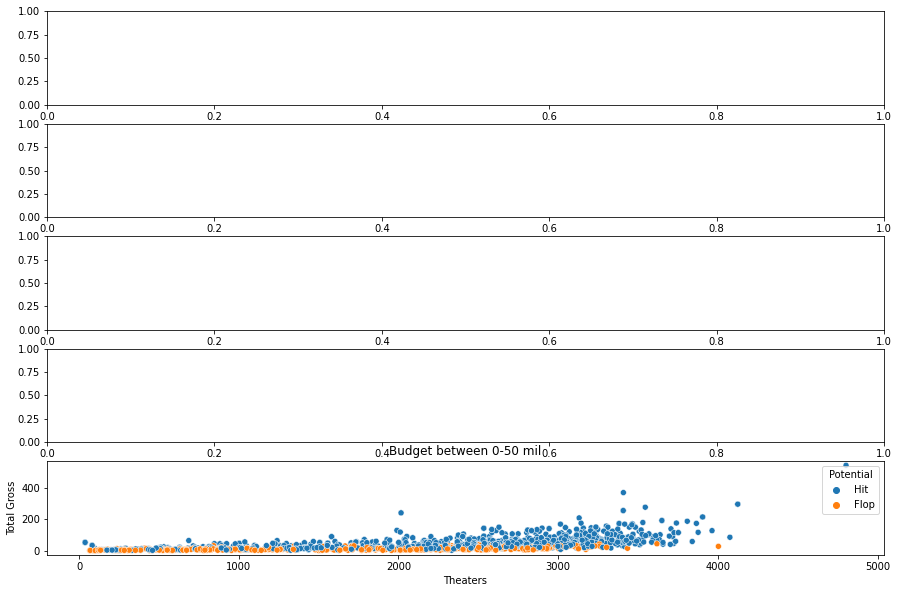

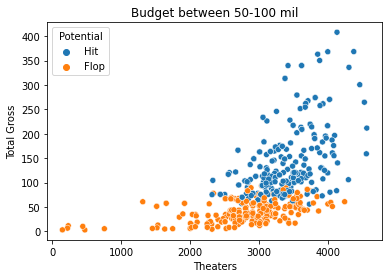

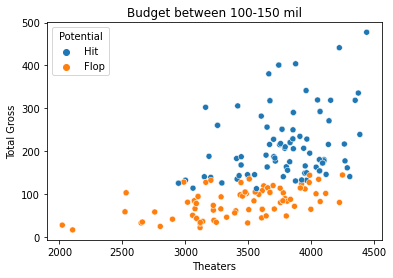

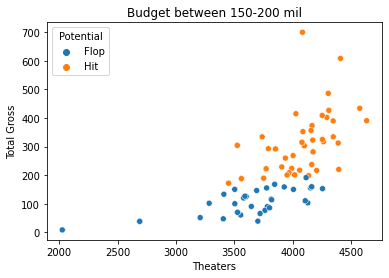

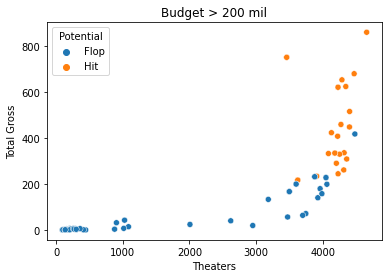

In [9]:
def plots(df):
    
    fig,axs = plt.subplots(5,1,figsize=(15,10))
    
    #axs = axs.flatten()
    
    colors = {'Hit':'green','Flop':'red'}
    df['Colors'] = df['Potential'].map(colors)
    axs[0] = sb.scatterplot(x="Theaters",y='Total Gross',hue='Potential',data=df[(df['Budgets']<=50)&(df['Budgets']>0)])
    axs[0].set_title("Budget between 0-50 mil")
    
    plt.show()
    
    axs[1] = sb.scatterplot(x="Theaters",y='Total Gross',hue='Potential',data=df[(df['Budgets']<=100)&(df['Budgets']>50)])
    axs[1].set_title("Budget between 50-100 mil")
    plt.show()
    
    axs[2] = sb.scatterplot(x="Theaters",y='Total Gross',hue='Potential',data=df[(df['Budgets']<=150)&(df['Budgets']>100)])
    axs[2].set_title("Budget between 100-150 mil")
    
    plt.show()
    
    axs[3] = sb.scatterplot(x="Theaters",y='Total Gross',hue='Potential',data=df[(df['Budgets']<=200)&(df['Budgets']>150)])
    axs[3].set_title("Budget between 150-200 mil")
    
    plt.show()
    
    axs[4] = sb.scatterplot(x="Theaters",y='Total Gross',hue='Potential',data=df[(df['Budgets']>200)])
    axs[4].set_title("Budget > 200 mil")
 
    plt.show()
    
plots(df)

In [10]:
df['Result'] = df['Potential'].apply(lambda x: 1 if x == 'Hit' else 0)
df.head()

,Release,MoR,Budgets,Theaters,Total Gross,Potential,Colors,Result
0,How the Grinch Stole Christmas,11,123.0,3256,260.044825,Hit,green,1
1,Mission: Impossible II,5,125.0,3669,215.409889,Hit,green,1
2,Gladiator,5,103.0,3188,187.705427,Hit,green,1
3,The Perfect Storm,6,120.0,3407,182.618434,Hit,green,1
4,Meet the Parents,10,55.0,2697,166.244045,Hit,green,1


<AxesSubplot:xlabel='Theaters', ylabel='Result'>

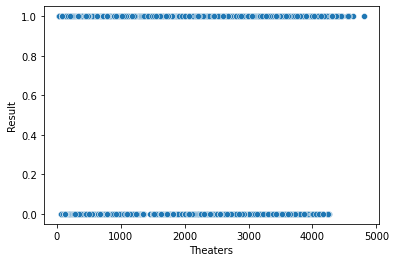

In [11]:
sb.scatterplot(x='Theaters',y='Result',data=df[df['Budgets']<=300])

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from scipy import stats

In [13]:
X = df[['Budgets','Theaters']]
y = df['Result']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.33, random_state=42)

In [15]:
model1 = LogisticRegression()
model1.fit(X_train,y_train)

LogisticRegression()

In [16]:
y_probs = model1.predict_proba(X_test)[:, 1]
y_probs

array([7.46558621e-01, 2.98869291e-01, 8.15779082e-01, 5.81377141e-01,
       7.69948321e-01, 6.80496417e-01, 5.86535170e-01, 7.63833905e-01,
       8.27686470e-01, 8.04892253e-01, 4.60779115e-01, 4.96799069e-01,
       7.86384552e-01, 7.04220765e-01, 3.05933036e-01, 6.98495963e-01,
       8.76277641e-01, 2.69378428e-01, 7.23172702e-01, 4.13029399e-01,
       7.53430728e-01, 6.33584324e-01, 7.16943296e-01, 5.36799944e-01,
       3.65990465e-01, 7.27800468e-01, 8.09236039e-01, 6.29664277e-01,
       7.24928145e-01, 2.45381488e-01, 6.53119355e-01, 7.51341703e-01,
       8.23238533e-01, 6.05405671e-01, 5.89271782e-01, 4.06986251e-01,
       5.17570845e-01, 5.65457403e-01, 7.56013754e-01, 6.25573173e-01,
       3.81023878e-01, 5.84785060e-02, 7.67810628e-01, 7.83124303e-01,
       6.23676743e-01, 5.48008643e-01, 4.52755620e-01, 5.97409346e-01,
       8.23526634e-01, 8.70196799e-01, 7.54494107e-01, 3.92698291e-01,
       7.59746610e-01, 7.73476986e-01, 7.14210951e-01, 3.83005974e-01,
      

In [17]:
preds2 = (y_probs>0.3).astype(int)
preds2

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,

In [18]:
preds1 = model1.predict(X_test)

In [19]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
#from sklearn.metrics import plot_confusion_matrix

In [20]:
preds1

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,

In [21]:
np.mean(preds2==y_test)

0.6089238845144357

In [22]:
cm1 = confusion_matrix(y_test,preds1,labels=[0,1])
cm1

array([[113, 204],
       [ 87, 358]])

In [23]:
cm2 = confusion_matrix(y_test,preds2,labels=[0,1])
cm2

array([[ 32, 285],
       [ 13, 432]])

In [24]:
preds3 = (y_probs>0.7).astype(int)
cm3 = confusion_matrix(y_test,preds3,labels=[0,1])
cm3

array([[253,  64],
       [201, 244]])

In [25]:
cm3[0][0]

253

In [28]:
np.mean(preds3==y_test)

0.652230971128609

In [29]:
from sklearn.metrics import roc_curve, roc_auc_score


In [30]:
s1 = roc_auc_score(y_test,preds3)
s1

0.6732109311310389

In [36]:
def roc(model):
    
    y_probs = model.predict_proba(X_test)[:, 1]
    tp = []
    fp = []
    
    for i in range(1,10):
        j = i/10
        preds = (y_probs>j).astype(int)
        cm = confusion_matrix(y_test,preds,labels=[0,1])
        tp.append(cm[1][1])
        fp.append(cm[0][1])
#     roc_auc = auc(fp, tp)

#     # Print the AUC
#     print("AUC:", roc_auc)
    plt.plot(fp,tp)
    plt.show()

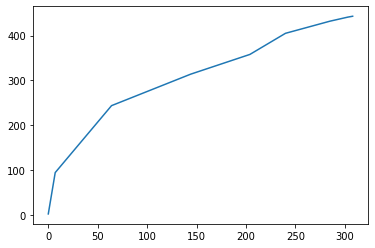

In [37]:
roc(model1)

In [33]:
probs = model1.predict_proba(X_test)
probs=probs[:,1]
fpr,tpr,_ = roc_curve(y_test,probs)

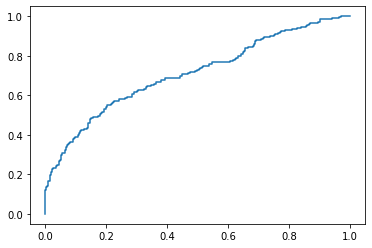

In [34]:
plt.plot(fpr,tpr)

In [35]:
print(roc_auc_score(y_test,probs))

0.7095027115159678
